In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import pandas as pd
%matplotlib inline

In [13]:
plt.style.use("ggplot")
np.random.seed(123)

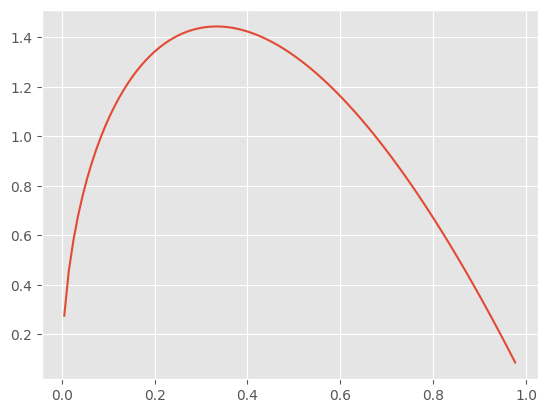

In [14]:
a,b=1.5,2.0
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x,beta.pdf(x,a,b))

In [15]:
theta =.8
NMCS=20000
epsilon=.5
theta_mcs=[theta]
for i in range(NMCS):
    theta_new =theta+epsilon*np.random.randn()
    if beta.pdf(theta_new,a,b)>beta.pdf(theta,a,b):
        theta = theta_new
    else:
        r=beta.pdf(theta_new,a,b)/beta.pdf(theta,a,b)
        if np.random.rand()<r:
            theta=theta_new
    theta_mcs.append(theta)
df=pd.DataFrame(theta_mcs)

In [16]:
df.head()

,0
0,0.800000
1,0.257185
2,0.755857
3,0.755857
4,0.755857


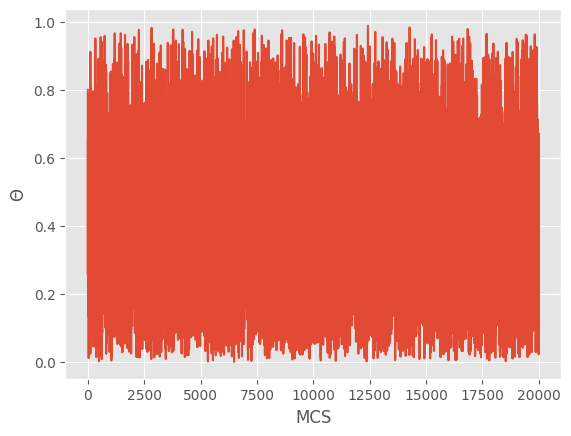

In [17]:
plt.plot(df[0])
plt.xlabel("MCS")
plt.ylabel("$\\Theta$")
plt.show()

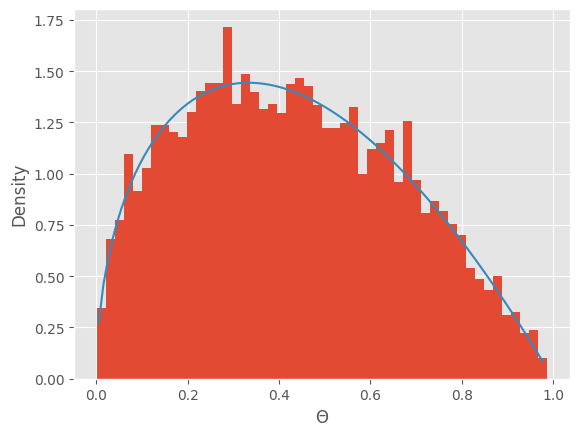

In [18]:
plt.hist(df[0][1000:],bins=50,density=True)
plt.plot(x,beta.pdf(x,a,b))
plt.xlabel("$\\Theta$")
plt.ylabel("Density")
plt.show()